<a href="https://colab.research.google.com/github/Fasiloc/Mathematics_learn-repo/blob/main/Classes/Day_15_Random_variable_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install symbulate

     |████████████████████████████████| 44 kB 2.6 MB/s 


In [ ]:
from symbulate import *
%matplotlib inline

# Defining a random variable with `RV`
The `RV` class defines random variables on a probability space. A random variable is a function which maps each outcome of a probability space to a real number; therefore a probability space must be defined first.

>Example. Consider the random variable  X  representing the number of Heads in 5 flips of a fair coin. With 1 representing Heads and 0 Tails, we can count the number of Heads by summing the 0/1 values. We define a probability space corresponding to 5 flips of a fair coin, and then a RV on that space which takes an outcome and sums its values.


In [ ]:
P = BoxModel([0, 1], size=5)
X = RV(P, sum)

A random variable can be called as a function to return its value for a particular outcome in the probability space.

In [ ]:
outcome = (0, 1, 0, 1, 1)
X(outcome)

3

If no function is specified in RV, the default is the identity function, f(x) = x.

In [ ]:
P = Normal(mean=0.6, sd=1.9)
X = RV(P)
X(-0.5)

-0.5

Like the probability space defintions, the RV command only defines a random variable. Simulation tools like .sim(), .tabulate(), .filter(), and .count() work for RV just like for ProbabilitySpace.

In [ ]:
P = BoxModel([0, 1], size=5)
X = RV(P, sum)
values = X.sim(10000)
values

0,1
1,2
2,2
3,4
4,1
5,2
6,1
7,1
8,3
...,...
9999,2


> Example: Create the probability distribution of the random variable 'Number of heads' in tossing 5 unbiased coins.

In [ ]:
P = BoxModel([0, 1], size=5)
X = RV(P, sum)
values = X.sim(10000)
values.tabulate(normalize=True)

0,0.0308
1,0.1571
2,0.3143
3,0.3094
4,0.1544
5,0.034
Total,1.0


## Simulating events
An event is a set of outcomes in the probability space. For example, if the random variable  X  represents the number of Heads in 5 flips of a fair coin, then the event  {X>3}  is the collection of Heads/Tails sequences with more than 3 Heads. For syntactical reasons, in Symbulate events must be enclosed in parentheses rather than braces, e.g (X > 3). Events like (X > 3) can be simulated; calling .sim() on an event returns True for outcomes where the event occurs and False otherwise. Simulating events provides another method for estimating probabilities.

>Example. If  X  represents the number of Heads in 5 flips of a fair coin, the following is one method for estimating  $P(X>3)$ , the probability of more than 3 Heads in 5 flips of a fair coin. (The true probability is 0.1875.)

In [ ]:
P = BoxModel([0, 1], size=5)
X = RV(P, sum)
(X > 3).sim(10000).tabulate(normalize=True)

False,0.8204
True,0.1796
Total,1.0


In [ ]:
#finding probability for getting exactly 3
P = BoxModel([0, 1], size=5)
X = RV(P, sum)
(X == 3).sim(10000).tabulate(normalize=True)

False,0.6994
True,0.3006
Total,1.0


## Visualizing simulation results with .plot()
The `.tabulate()` method provides a tabular summary of the simulated values of an RV. A plot summary can be obtained with `.plot()`. The type of plot returned depends on the type of the random variable, discrete or continuous.

For discrete random variables, `.plot()` generally returns an "impulse" (or "spike") plot of the relative frequencies for each of the realized values. (Frequencies (counts) can be obtained using the normalize=False option.)

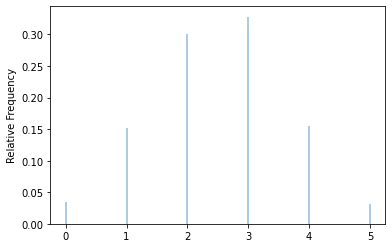

In [ ]:
P = BoxModel([0, 1], size=5)
X = RV(P, sum)
X.sim(1000).plot()

For continuous random variables, `.plot()` returns a histogram, which provides the frequencies of simulated values falling in interval "bins". By default, the vertical axis of the histogram is on the density scale, so that areas of the bars correspond to relative frequencies. (Bin frequencies (counts) can be obtained using the `normalize=False` option.)

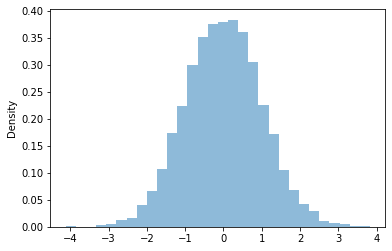

In [ ]:
P = Normal(mean=0, sd=1)
X = RV(P)
X.sim(10000).plot()


## Functions of a random variable
A transformation of a random variable is also a random variable. If  X  is a random variable and  g  is function, define a new random variable  `Y=g(X)`  in Symbulate using the `.apply()` method, e.g. `Y = X.apply(g)`. An RV defined via a transformation of another `RV` behaves like any Symbulate `RV`.

Note that for arithmetic operations and many math functions (such as exp, log, sin) you can simply call g(X) rather than X.apply(g). User-defined functions can also be used to define or transform random variables.

>Example. If  X  has a normal distribution, then  $e^X$  has a lognormal distribution.

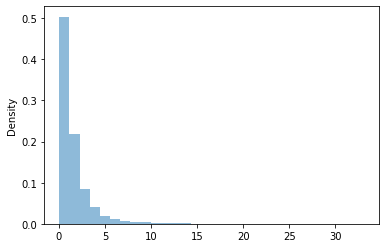

In [ ]:
X = RV(Normal(mean=0, var=1))
Y = exp(X) # same as X.apply(exp)
Y.sim(10000).plot()

## Visualization of Multi-variate Normal distributions

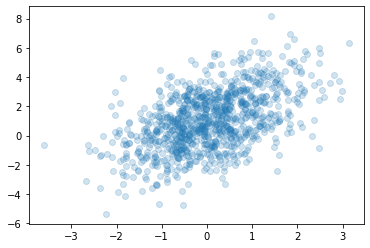

In [ ]:
x = RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = 0.5)).sim(1000)
x.plot(alpha = 0.2)

In [ ]:
x.mean(), x.sd(), x.corr()

((0.04569073868724792, 1.0331921542952152),
 (1.0054213545332833, 1.9901831053623902),
 0.5149398141746905)

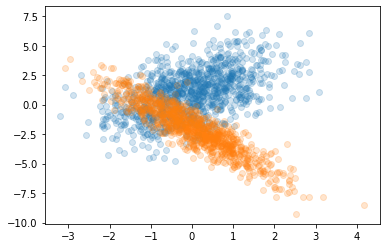

In [ ]:
RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = 0.5)).sim(1000).plot(alpha = 0.2)
RV(BivariateNormal(mean1 = 0, mean2 = -2, var1 = 1, var2 = 4, cov = -1.8)).sim(1000).plot(alpha = 0.2)

## Plotting Marginal distributions

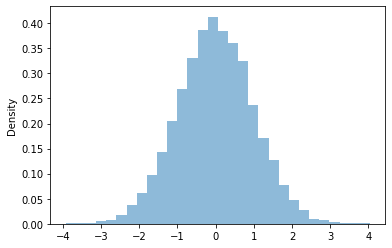

In [ ]:
X, Y = RV(BivariateNormal(mean1 = 0, mean2 = 1, sd1 = 1, sd2 = 2, corr = 0.5))
X.sim(10000).plot()

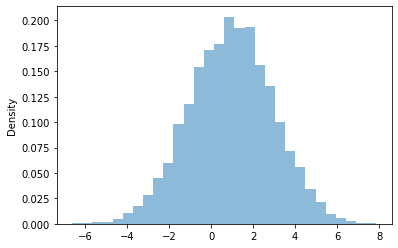

In [ ]:
Y.sim(10000).plot()

## Multivariate Normal distributions.
 A bivariate normal distribution is a special case of a Multivariate Normal distribution (a.k.a. joint Gaussian distribution). A multivariate normal distribution is specified by

* a mean vector, which specifies the marginal means
* a covariance matrix, which specifies the covariance between each coordinate pair. (The diagonal entries of the covariance matrix specify the marginal variances

In [ ]:
mu = [1, 2, 3]
Sigma = [[1, 1, -2],
        [1, 4, 0],
        [-2, 0, 9]]
X = RV(MultivariateNormal(mean = mu, cov = Sigma))
X.sim(5)

0,"(0.19321445711677332, 2.8817040613266105, 4.666019592835287)"
1,"(2.054540882893153, 5.015226855331728, 2.7788738452624306)"
2,"(0.28332609704527023, 1.257354395289353, 5.119258640572397)"
3,"(0.7164182839428597, 2.659312455887253, 6.6141507489186875)"
4,"(1.4216841432849017, 4.371582823429321, 4.711024256388012)"


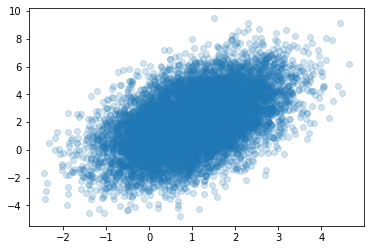

In [ ]:
X, Y, Z = RV(MultivariateNormal(mean = mu, cov = Sigma))
(X & Y).sim(10000).plot(alpha = 0.2)

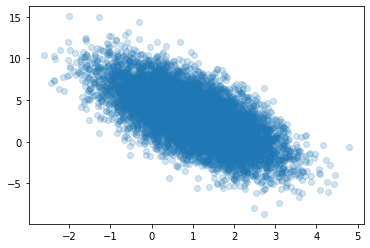

In [ ]:
(X & Z).sim(10000).plot(alpha = 0.2)

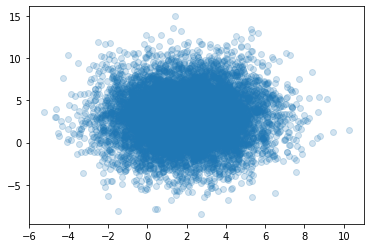

In [ ]:
(Y & Z).sim(10000).plot(alpha = 0.2)

## RandomProcess and Time Index
Much like `RV`, a `RandomProcess` can be defined on a `ProbabilitySpace`. For a `RandomProcess`, however, the `TimeIndex` must also be specified. 

The following code defines a `RandomProcess` $X$ by first defining an appropriate function f. Note that an outcome in the probability space consists of an  A,B  pair, represented as  $ω_0$  and  $ω_1$  in the function. A RandomProcess is then defined by specifying: the probability space, the time index set, and the  $X(ω,t)$  function.

In [ ]:
def f(omega, t):
    return omega[0] + omega[1] * t

X = RandomProcess(Bernoulli(0.9) * Bernoulli(0.7), Naturals(), f)

For a given outcome in the probability space, a random process outputs a sample path which describes how the value of the process evolves over time for that particular outcome. Calling .plot() for a RandomProcess will return a plot of sample paths. The parameter alpha controls the weight of the line drawn in the plot. The paramaters tmin and tmax control the range of time values in the display.

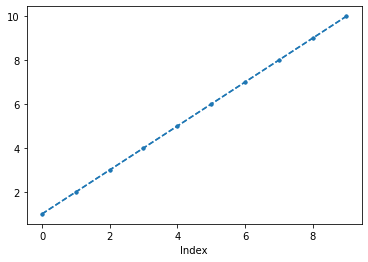

In [ ]:
X.sim(2).plot(alpha = 1)

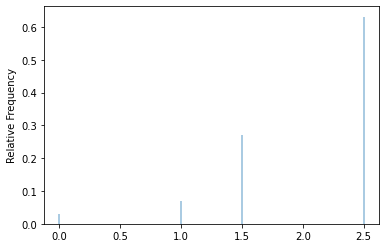

In [ ]:
def f(omega, t):
    return omega[0] * t + omega[1]

X = RandomProcess(Bernoulli(0.9) * Bernoulli(0.7),Reals(),  f)

X[1.5].sim(10000).plot()


Find the joint distribution of process values at times 1 and 1.5.

In [ ]:
(X[1] & X[1.5]).sim(1000).tabulate(normalize=True)

"(0, 0.0)",0.038
"(1, 1.0)",0.065
"(1, 1.5)",0.291
"(2, 2.5)",0.606
Total,1.0


Find the conditional distribution of  X(1.5)  given  X(1)=1) (X[1.5] |

In [ ]:
(X[1.5] | (X[1] == 1)).sim(10000).tabulate(normalize=True)

1.0,0.2023
1.5,0.7977
Total,1.0


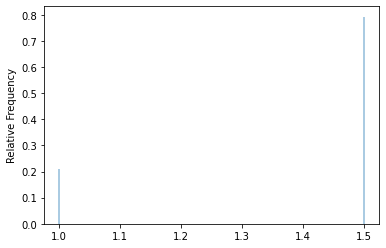

In [ ]:
(X[1.5] | (X[1] == 1)).sim(10000).plot()

### Mean function
The mean function of a stochastic process  X(t)  is a deterministic function which maps  t  to  E(X(t)) . The mean function can be estimated and plotted by simulating many sample paths of the process and using .mean().

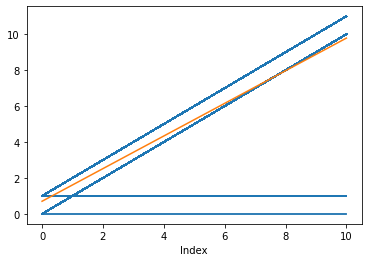

In [ ]:
paths = X.sim(1000)
plot(paths)
plot(paths.mean(), 'r')

### Variance 
The variance function maps  t  to  Var(X(t)) ; similarly for the standard deviation function. These functions can be used to give error bands about the mean function.

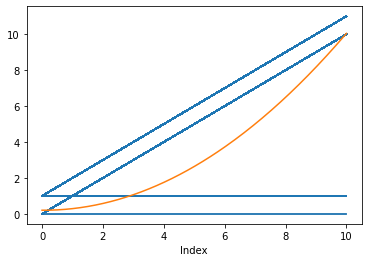

In [ ]:
paths = X.sim(1000)
plot(paths)
plot(paths.var(), 'r')

## Markov Process
Markov processes are stochastic processes which obey a specific kind of "next step" dependence structure. For a Markov process, roughly speaking, given the present, the future is conditionally independent of the past.

>Example. The weather in a certain city can be classified as either cloudy, rainy, or sunny and follows a discrete time Markov chain.

* Given that it is cloudy today, tomorrow it will be cloudy with probability 0.3, rainy with probability 0.2, or sunny with probability 0.5.
* Given that it is rainy today, tomorrow it will be cloudy with probability 0.5, rainy with probability 0.3, or sunny with probability 0.2.
* Given that it is sunny today, tomorrow it will be cloudy with probability 0.3, rainy with probability 0, or sunny with probability 0.7.
Suppose that it is sunny on Sunday. (So we'll call Sunday n=0 .)
Find the probability that it is rainy on Friday ( n=5 ).

In [ ]:
states = ["cloud", "rain", "sun"]

TransitionMatrix = [[0.3, 0.2, 0.5],
                   [0.5, 0.3, 0.2],
                   [0.3, 0.0, 0.7]]

InitialDistribution = [0, 0, 1] # sunny on Sunday

X = MarkovChain(TransitionMatrix, InitialDistribution, states)

In [ ]:
X[5].sim(10000).tabulate(normalize = True) # prdecting climate of Friday

cloud,0.3214
rain,0.0921
sun,0.5865
Total,1.0


In [ ]:
X[3].sim(10000).tabulate(normalize = True) # prdecting climate of Wednesday

cloud,0.3128
rain,0.0736
sun,0.6136
Total,1.0


>Find the conditional probability that it is rainy on Friday given that it is rainy on Thursday. (The following should return, approximately, the second row of the transition matrix.)

In [ ]:
(X[5] | (X[4] == "rain")).sim(10000).tabulate(normalize = True)


cloud,0.5001
rain,0.2942
sun,0.2057
Total,1.0


In [ ]:
(X[5] | ((X[4] == "rain") & (X[3] == "cloud"))).sim(10000).tabulate(normalize = True)

cloud,0.5024
rain,0.2967
sun,0.2009
Total,1.0


>Find the probability that it is rainy on Friday and Saturday.
(X[5] & X[6]).sim(10000).tabulate(normalize = True)

In [ ]:
(X[5] & X[6]).sim(10000).tabulate(normalize = True)

"(cloud, cloud)",0.0988
"(cloud, rain)",0.0616
"(cloud, sun)",0.1619
"(rain, cloud)",0.0473
"(rain, rain)",0.0255
"(rain, sun)",0.0168
"(sun, cloud)",0.1735
"(sun, sun)",0.4146
Total,1.0000000000000002
